# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Соотношение-классов" data-toc-modified-id="Соотношение-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Соотношение классов</a></span></li><li><span><a href="#Подбор-гиперпараметров-модели" data-toc-modified-id="Подбор-гиперпараметров-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подбор гиперпараметров модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестовая выборка</a></span></li><li><span><a href="#AUC-ROC" data-toc-modified-id="AUC-ROC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>AUC-ROC</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from random import randint

try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

display(data.tail())
data.info()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В исследуемом датасете для прогноза используются следующие признаки: 
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
Скорее всего номер строки, индекс строки, ID клиента и его фамилия никак не влияют на вероятность ухода клиента, поэтому эти столбцы следует заранее убрать из таблицы. В столбце Tenure есть пропуски, но проигнорировать их нельзя, есть два варианта: 1) заполнить нулями, если эти клиенты сотрудничают с банком менее года, 2) нужно заполнять средними значениями 
Столбец Exited - целевой признак, относится к категориальным переменным, значит перед нами стоит задача классификации.

In [2]:
#выделение нужных столбцов
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Исследование задачи

Предстоит обучить модель для выполнения задачи классификации, для обучения нужно подготовить признаки. Целевой признак Exited, остальные столбцы требуют предобработки: заполнение пропусков, кодирование категориальных переменных, масштабирование количественных переменных. Кроме того, нужно разделить данные на тренировочные, валидационные и тестовые, планируется соотношение 60:20:20.

In [3]:
#Прямое кодирование категориальных признаков One-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [5]:
# Заполнение пропусков случайными числами - они не повлияют на нормальное распределение
filler = []
maiximum = data['Tenure'].max()
for i in range(len(data['Tenure'])):
    filler.append(float(randint(0, maiximum)))
filler = pd.Series(filler)
data['Tenure'] = data['Tenure'].fillna(filler)
data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [6]:
features = data.drop(['Exited'], axis=1)# извлечение признаков
target = data['Exited'] # извлечение  целевого признака


In [7]:
 # разделение данных на тренировочные и валидационные+тестовые
features_train, features_test_and_valid, target_train, target_test_and_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)
# разделение данных на валидационные и тестовые
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test_and_valid, target_test_and_valid, test_size=0.5, random_state=12345, stratify=target_test_and_valid) 


In [8]:
#Масштабирование количественных признаков - стандартизация
# выберем числовые признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
# стандартизация
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features[numeric] = scaler.transform(features[numeric])
pd.options.mode.chained_assignment = None
display(features.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.318980,0.286049,-1.032264,-1.219673,1,1,1,0.016424,0,0,0
1,-0.432352,0.190726,-1.376755,0.119281,1,0,1,0.210988,0,1,0
2,-1.524838,0.286049,1.034676,1.331143,3,1,0,0.235131,0,0,0
3,0.505538,0.000079,-1.376755,-1.219673,2,0,0,-0.114325,0,0,0
4,2.061816,0.381372,-1.032264,0.785547,1,1,1,-0.370574,0,1,0


0    0.7963
1    0.2037
Name: Exited, dtype: float64


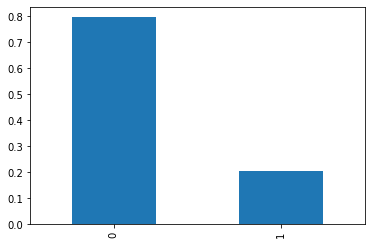

In [9]:
#подсчет частоты классов
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Имеет место дисбаланс классов, нулей в выборке в 4 раза больше, чем единиц. Посмотрим, к чему это может привести.

In [10]:
#Попробуем обучить модель без учета дисбаланса
model = RandomForestClassifier(n_estimators = 100, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(f1_score(target_valid, predicted_valid))

0.6062407132243686


F1-мера без учета дисбаланса довольно мала. В любом случае, признаки подготовлены к анализу, пропуски заполнены, категориальные признаки закодированы, можно приступать к борьбе с дисбалансом классов

In [11]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
# посчитаем площадь под ROC кривой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8641099184648734


ROC-AUC получилась довольно высокой, по некоторым классификациям это соответствует интервалу 0,8-0,9, очень хорошему качеству модели. Однако существуют данные о том, что AUC-ROC плохо подходит для несбалансированной классификации, и это похоже на правду.

## Борьба с дисбалансом

### Соотношение классов

In [12]:
#взвешивание классов
model = RandomForestClassifier(random_state=12345, n_estimators = 100, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.582701062215478


После "взвешивания" классов F1 метрика уменьшилась, что-то пошло не так.

In [13]:
#увеличение выборки - upsampling
def upsample(features, target, repeat): 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(    #перемешивание значений
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

model = RandomForestClassifier(n_estimators = 100, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print(target_upsampled.value_counts(normalize=True))


F1: 0.6351351351351351
0    0.66159
1    0.33841
Name: Exited, dtype: float64


Увеличение выборки немного помогло улучшить F1, но этого всё ещё мало. Параметр repeat я выбрала равным 2, т.к. значений 1 в исходном наборе данных примерно в 4 раза больше, чем 0, но предстоит ещё уменьшить выборку.

In [14]:
#уменьшение выборки - downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train, target_train = downsample(features_upsampled, target_upsampled, 0.5)

model = RandomForestClassifier(n_estimators = 100, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
best_f1 = f1_score(target_valid, predicted_valid)
print("F1:", best_f1)
print(target_train.value_counts(normalize=True))


F1: 0.6365638766519823
1    0.50569
0    0.49431
Name: Exited, dtype: float64


Уменьшение выборки ещё немного помогло, теперь классы представлены примерно поровну. Перейдем к настройке гиперпараметров модели.

### Подбор гиперпараметров модели

In [15]:
#random forest
model_1 = None
best_result = 0
balance = ['balanced', None]
for bal in balance:
    for est in range(50, 60, 1):
        for d in range(3, 11):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = d, class_weight= bal) # обучение модели с заданным количеством деревьев
            model.fit(features_train, target_train) # обучение модели на тренировочной выборке
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid) # оценка качества модели на валидационной выборке
            if result > best_result:
                model_1 = model
                best_result = result
                n_est = est
                depth = d
                weight = bal

print("f1 наилучшей модели на валидационной выборке:", best_result, "Количество деревьев", n_est, "Глубина дерева", d, "вес классов", weight)

f1 наилучшей модели на валидационной выборке: 0.644559585492228 Количество деревьев 58 Глубина дерева 10 вес классов None


In [16]:
#random forest
#Сравним метрики для обучающей и валидационной выборок, проверим на переобученность
predicted_train = model_1.predict(features_train)
print('f1 на обучающей выборке', f1_score(target_train, predicted_train))

f1 на обучающей выборке 0.9209167871154244


In [17]:
#random forest
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
# посчитаем площадь под ROC кривой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8663276554340329


Получается, что наилучший лес включает 58 деревьев с максимальной глубиной 10, со несбалансированным весом классов (этот параметр необязателен, т.к. дисбаланс выборки уже ликвидирован). Его F1 метрика составляет 0.643. Однако мы отлично помним насколько случайный лес склонен к переобучению, если проверить предсказания на тренировочной выборке, получится 0,923. Тем временем auc_roc почти не отличается от auc_roc до балансирования классов.

In [18]:
#LogisticRegression
model_2 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')# инициализация модели логистической регрессии с параметром random_state=12345
model_2.fit(features_train, target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid)
print('f1 на валидационной выборке', f1_score(target_valid, predicted_valid)) # получение метрики качества модели на валидационной выборке


f1 на валидационной выборке 0.6438213914849428


In [19]:
predicted_train = model_2.predict(features_train)
print('f1 на обучающей выборке', f1_score(target_train, predicted_train))

f1 на обучающей выборке 0.665438919582566


In [20]:
#LogisticRegression
probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
# посчитаем площадь под ROC кривой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7421035939501428


На валидационной выборке логистическая регрессия тоже хорошо справляется с заданием и проблема переобучения перед ней не стоит. Однако auc_roc для нее значительно ниже, чем у случайного леса. В любом случае всех рассудит тестовая выборка. 

## Тестирование модели

### Тестовая выборка

In [21]:
#тестовая выборка - random forest
predicted_test = model_1.predict(features_test)
print('f1 на тестовой выборке', f1_score(target_test, predicted_test))

f1 на тестовой выборке 0.5962343096234309


Случайный лес с параметрами n_estimators=58, max_depth =10, class_weight=None выдает на тестовой выборке достаточно хороший результат, он превышает заданный порог в 0,59.

In [22]:
#тестовая выборка - LogisticRegression
predicted_test = model_2.predict(features_test)
print('f1 на тестовой выборке', f1_score(target_test, predicted_test))

f1 на тестовой выборке 0.4401606425702812


Логистическая регрессия явно справляется с задачей хуже случайного леса, она не проходит испытание.

### AUC-ROC

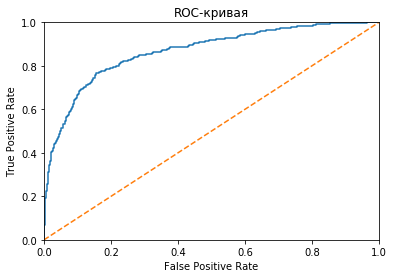

In [23]:
#график ROC для лучшей модели
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()

# построим график
plt.plot(fpr, tpr) # это наша кривая
plt.plot([0, 1], [0, 1], linestyle='--') # а это кривая случайной модели, она обозначена пунктиром

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [24]:
# посчитаем площадь под ROC кривой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8663276554340329


### Выводы
F1 оказалась более требовательной метрикой, чем accuracy, это связано с тем, что она оценивает не только долю правильных ответов, а взвешивает качество положительных и отрицательных предсказаний. В любом случае, площадь под кривой ROC оказалась больше 0,5, частота истинно позитивных ответов составляет 0,87, что приближается к 1.

### P.S.: feature importances

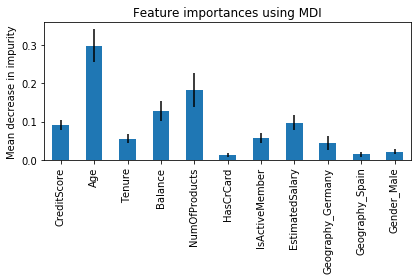

In [29]:
importances = model_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_1.estimators_], axis=0)
feature_names = list(features.columns)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()